# Library

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

# Load File

In [2]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
# Standardize features
minmax = MinMaxScaler()
minmax.fit(X_train)
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

# Function

In [9]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [10]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [11]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# Gradient boosting

### Default

In [12]:
time1_gbc = datetime.datetime.now()
gbc = GradientBoostingClassifier(random_state=None)
model = gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
y_probs_gbc = gbc.predict_proba(X_test)[:, 1]
time2_gbc = datetime.datetime.now()
print_score(y_test,y_pred_gbc,time1_gbc,time2_gbc)

comfusion matrix = 
[[2819   58]
 [  53 4163]]

accuracy_score =  0.9843507683631749

completeness =  0.9874288425047438
contamination =  0.013740819710968964

precision score =  0.986259180289031
recall score =  0.9874288425047438

F1 score =  0.9868436648097665

time span=  0:00:08.195777


### max_depth

In [13]:
time1_gbrt_1 = datetime.datetime.now()
gbrt_1 = GradientBoostingClassifier(max_depth=5, n_estimators=500,learning_rate=0.1,random_state=None)
gbrt_1.fit(X_train, y_train)

errors_1 = [mean_squared_error(y_test, y_pred_gbrt_1)
          for y_pred_gbrt_1 in gbrt_1.staged_predict(X_test)]
bst_n_estimators_1 = np.argmin(errors_1)

gbrt_best_1 = GradientBoostingClassifier(max_depth=5,n_estimators=bst_n_estimators_1,learning_rate=0.1,random_state=None)
model_gbrt_1 = gbrt_best_1.fit(X_train, y_train)
y_pred_gbrt_best_1 = gbrt_best_1.predict(X_test)
y_probs_gbrt_best_1 = gbrt_best_1.predict_proba(X_test)[:, 1]
time2_gbrt_1 = datetime.datetime.now()
print_score(y_test,y_pred_gbrt_best_1,time1_gbrt_1 ,time2_gbrt_1 )

comfusion matrix = 
[[2826   51]
 [  46 4170]]

accuracy_score =  0.9863245453263781

completeness =  0.9890891840607211
contamination =  0.012082444918265814

precision score =  0.9879175550817342
recall score =  0.9890891840607211

F1 score =  0.9885030224013275

time span=  0:02:09.063337


375


<IPython.core.display.Javascript object>


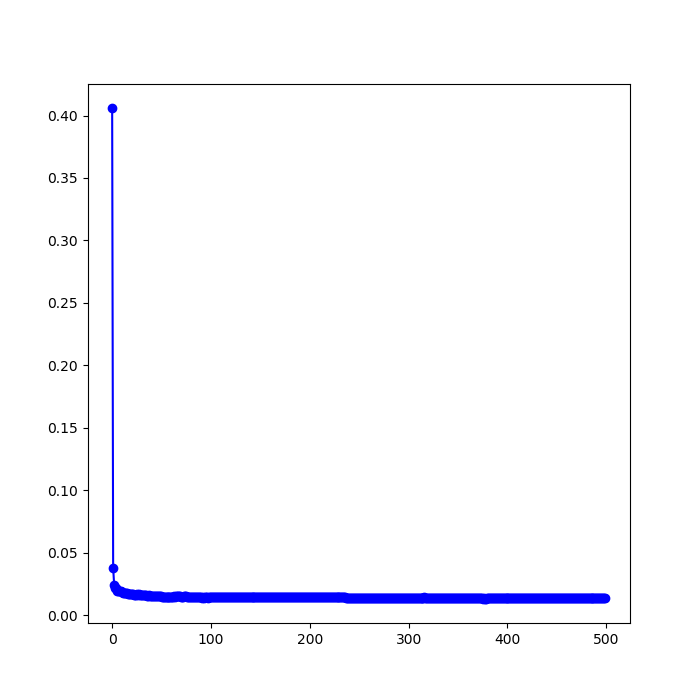

In [14]:
print(bst_n_estimators_1)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_1, "bo-")
plt.show()

In [15]:
time1_gbrt_2 = datetime.datetime.now()
gbrt_2 = GradientBoostingClassifier(max_depth=3, n_estimators=500,learning_rate=0.1,random_state=None)
gbrt_2.fit(X_train, y_train)

errors_2 = [mean_squared_error(y_test, y_pred_gbrt_2)
          for y_pred_gbrt_2 in gbrt_2.staged_predict(X_test)]
bst_n_estimators_2 = np.argmin(errors_2)

gbrt_best_2 = GradientBoostingClassifier(max_depth=3,n_estimators=bst_n_estimators_2,learning_rate=0.1,random_state=None)
model_gbrt_2 = gbrt_best_2.fit(X_train, y_train)
y_pred_gbrt_best_2 = gbrt_best_2.predict(X_test)
y_probs_gbrt_best_2 = gbrt_best_2.predict_proba(X_test)[:, 1]
time2_gbrt_2 = datetime.datetime.now()
print_score(y_test,y_pred_gbrt_best_2,time1_gbrt_2 ,time2_gbrt_2)

comfusion matrix = 
[[2827   50]
 [  38 4178]]

accuracy_score =  0.9875934019455801

completeness =  0.9909867172675522
contamination =  0.011825922421948912

precision score =  0.9881740775780511
recall score =  0.9909867172675522

F1 score =  0.9895783988630981

time span=  0:01:13.078818


470


<IPython.core.display.Javascript object>


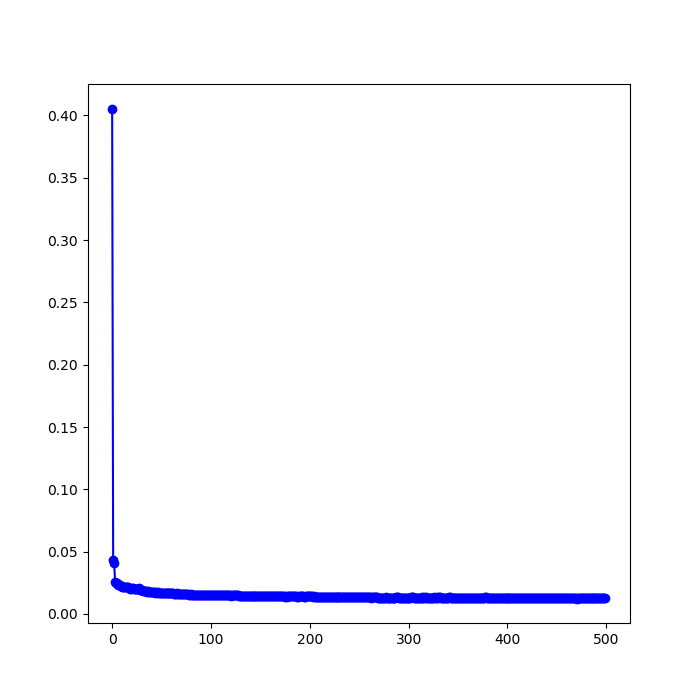

In [16]:
print(bst_n_estimators_2)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_2, "bo-")
plt.show()

In [17]:
time1_gbrt_3 = datetime.datetime.now()
gbrt_3 = GradientBoostingClassifier(max_depth=1, n_estimators=500,learning_rate=0.1,random_state=None)
gbrt_3.fit(X_train, y_train)

errors_3 = [mean_squared_error(y_test, y_pred_gbrt_3)
          for y_pred_gbrt_3 in gbrt_3.staged_predict(X_test)]
bst_n_estimators_3 = np.argmin(errors_3)

gbrt_best_3 = GradientBoostingClassifier(max_depth=1,n_estimators=bst_n_estimators_3,learning_rate=0.1,random_state=None)
model_gbrt_3 = gbrt_best_3.fit(X_train, y_train)
y_pred_gbrt_best_3 = gbrt_best_3.predict(X_test)
y_probs_gbrt_best_3 = gbrt_best_3.predict_proba(X_test)[:, 1]
time2_gbrt_3 = datetime.datetime.now()
print_score(y_test,y_pred_gbrt_best_3,time1_gbrt_3 ,time2_gbrt_3)

comfusion matrix = 
[[2804   73]
 [  62 4154]]

accuracy_score =  0.9809671507119695

completeness =  0.9852941176470589
contamination =  0.01726993139342323

precision score =  0.9827300686065767
recall score =  0.9852941176470589

F1 score =  0.984010422835485

time span=  0:00:22.141203


468


<IPython.core.display.Javascript object>


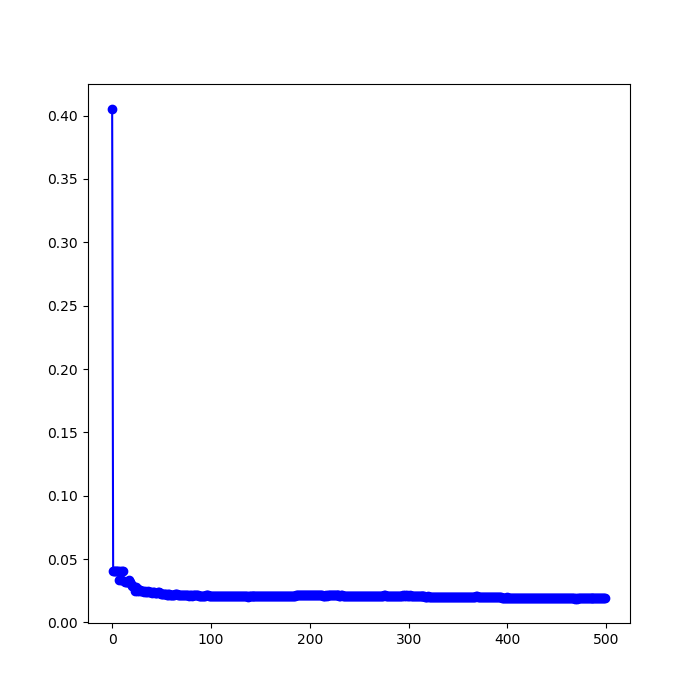

In [18]:
print(bst_n_estimators_3)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_3, "bo-")
plt.show()

In [19]:
time1_gbrt_4 = datetime.datetime.now()
gbrt_4 = GradientBoostingClassifier(max_depth=5, n_estimators=500,learning_rate=0.5,random_state=None)
gbrt_4.fit(X_train, y_train)

errors_4 = [mean_squared_error(y_test, y_pred_gbrt_4)
          for y_pred_gbrt_4 in gbrt_4.staged_predict(X_test)]
bst_n_estimators_4 = np.argmin(errors_4)

gbrt_best_4 = GradientBoostingClassifier(max_depth=5,n_estimators=bst_n_estimators_4,learning_rate=0.5,random_state=None)
model_gbrt_4 = gbrt_best_4.fit(X_train, y_train)
y_pred_gbrt_best_4 = gbrt_best_4.predict(X_test)
y_probs_gbrt_best_4 = gbrt_best_4.predict_proba(X_test)[:, 1]
time2_gbrt_4 = datetime.datetime.now()
print_score(y_test,y_pred_gbrt_best_4,time1_gbrt_4 ,time2_gbrt_4)

comfusion matrix = 
[[2818   59]
 [  43 4173]]

accuracy_score =  0.985619624982377

completeness =  0.9898007590132827
contamination =  0.013941398865784499

precision score =  0.9860586011342155
recall score =  0.9898007590132827

F1 score =  0.9879261363636364

time span=  0:00:50.381061


134


<IPython.core.display.Javascript object>


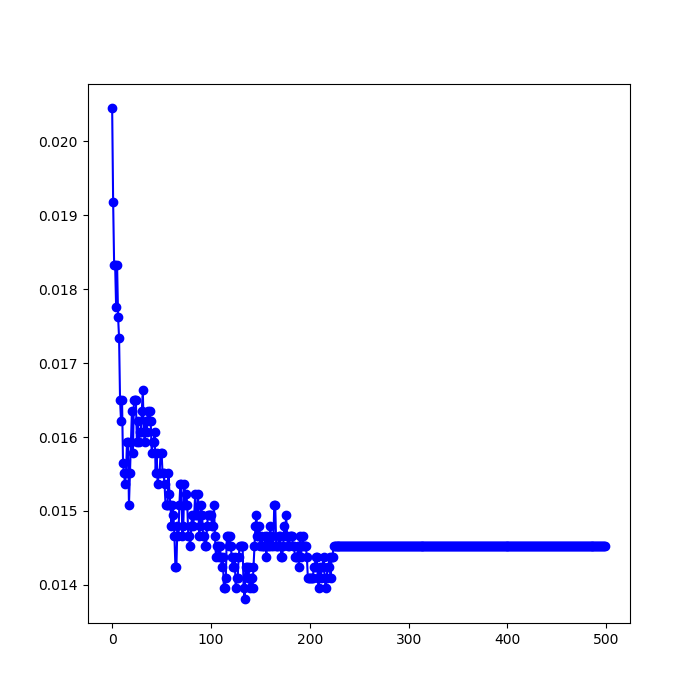

In [20]:
print(bst_n_estimators_4)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_4, "bo-")
plt.show()

In [21]:
time1_gbrt_5 = datetime.datetime.now()
gbrt_5 = GradientBoostingClassifier(max_depth=5, n_estimators=500,learning_rate=0.75,random_state=None)
gbrt_5.fit(X_train, y_train)

errors_5 = [mean_squared_error(y_test, y_pred_gbrt_5)
          for y_pred_gbrt_5 in gbrt_5.staged_predict(X_test)]
bst_n_estimators_5 = np.argmin(errors_5)

gbrt_best_5 = GradientBoostingClassifier(max_depth=5,n_estimators=bst_n_estimators_5,learning_rate=0.75,random_state=None)
model_gbrt_5 = gbrt_best_5.fit(X_train, y_train)
y_pred_gbrt_best_5 = gbrt_best_5.predict(X_test)
y_probs_gbrt_best_5 = gbrt_best_5.predict_proba(X_test)[:, 1]
time2_gbrt_5 = datetime.datetime.now()
print_score(y_test,y_pred_gbrt_best_5,time1_gbrt_5 ,time2_gbrt_5)

comfusion matrix = 
[[2822   55]
 [  53 4163]]

accuracy_score =  0.9847737205695757

completeness =  0.9874288425047438
contamination =  0.013039355144618302

precision score =  0.9869606448553817
recall score =  0.9874288425047438

F1 score =  0.9871946881669433

time span=  0:00:35.690326


85


<IPython.core.display.Javascript object>


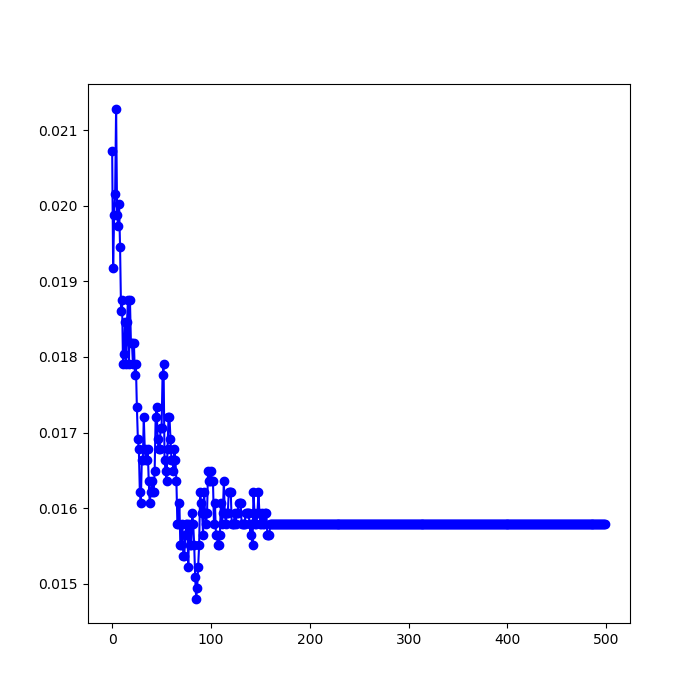

In [22]:
print(bst_n_estimators_5)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_5, "bo-")
plt.show()

In [23]:
time1_gbrt_6 = datetime.datetime.now()
gbrt_6 = GradientBoostingClassifier(max_depth=3, n_estimators=500,learning_rate=0.5,random_state=None)
gbrt_6.fit(X_train, y_train)

errors_6 = [mean_squared_error(y_test, y_pred_gbrt_6)
          for y_pred_gbrt_6 in gbrt_6.staged_predict(X_test)]
bst_n_estimators_6 = np.argmin(errors_6)

gbrt_best_6 = GradientBoostingClassifier(max_depth=3,n_estimators=bst_n_estimators_6,learning_rate=0.5,random_state=None,verbose=1)
model_gbrt_6 = gbrt_best_6.fit(X_train, y_train)
y_pred_gbrt_best_6 = gbrt_best_6.predict(X_test)
y_probs_gbrt_best_6 = gbrt_best_6.predict_proba(X_test)[:, 1]
time2_gbrt_6 = datetime.datetime.now()
print_score(y_test,y_pred_gbrt_best_6,time1_gbrt_6 ,time2_gbrt_6)

      Iter       Train Loss   Remaining Time 
         1           0.6555           30.37s
         2           0.4065           32.13s
         3           0.2794           31.75s
         4           0.2067           31.28s
         5           0.1634           30.97s
         6           0.1382           30.74s
         7           0.1193           30.57s
         8           0.1099           30.34s
         9           0.0995           30.18s
        10           0.0916           29.96s
        20           0.0718           27.41s
        30           0.0629           25.71s
        40           0.0561           24.51s
        50           0.0500           23.46s
        60           0.0420           22.68s
        70           0.0380           21.87s
        80           0.0338           21.21s
        90           0.0300           20.62s
       100           0.0270           19.93s
       200           0.0089           12.93s
       300           0.0035            5.96s
comfusion

384


<IPython.core.display.Javascript object>


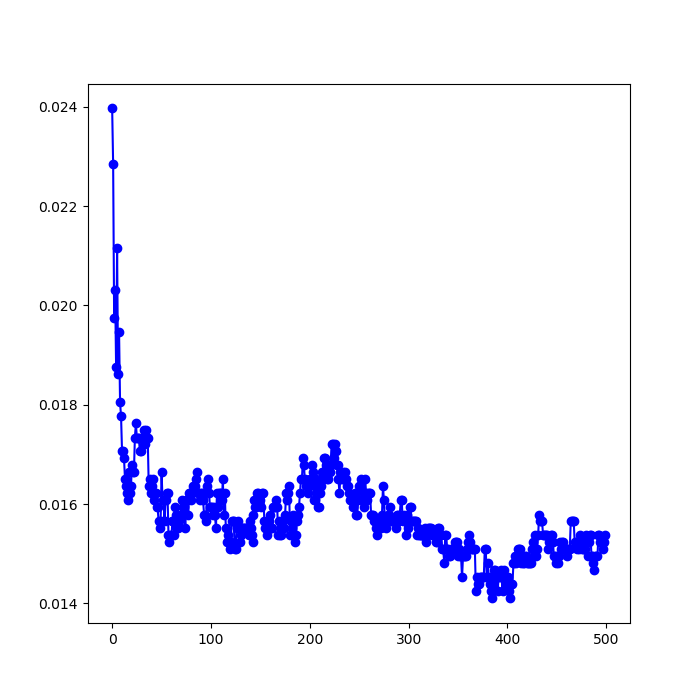

In [24]:
print(bst_n_estimators_6)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_6, "bo-")
plt.show()

In [25]:
time1_gbrt_7 = datetime.datetime.now()
gbrt_7 = GradientBoostingClassifier(max_depth=3, n_estimators=500,learning_rate=0.75,random_state=None)
gbrt_7.fit(X_train, y_train)

errors_7 = [mean_squared_error(y_test, y_pred_gbrt_7)
          for y_pred_gbrt_7 in gbrt_7.staged_predict(X_test)]
bst_n_estimators_7 = np.argmin(errors_7)

gbrt_best_7 = GradientBoostingClassifier(max_depth=3,n_estimators=bst_n_estimators_7,learning_rate=0.75,random_state=None,verbose=1)
model_gbrt_7 = gbrt_best_7.fit(X_train, y_train)
y_pred_gbrt_best_7 = gbrt_best_7.predict(X_test)
y_probs_gbrt_best_7 = gbrt_best_7.predict_proba(X_test)[:, 1]
time2_gbrt_7 = datetime.datetime.now()
print_score(y_test,y_pred_gbrt_best_7,time1_gbrt_7 ,time2_gbrt_7)

      Iter       Train Loss   Remaining Time 
         1           0.4573            3.91s
         2           0.2585            3.81s
         3           0.1752            3.72s
         4           0.1333            3.62s
         5           0.1152            3.55s
         6           0.0964            3.47s
         7           0.0903            3.39s
         8           0.0856            3.25s
         9           0.0832            3.11s
        10           0.0824            2.98s
        20           0.0647            2.12s
        30           0.0560            1.41s
        40           0.0471            0.70s
        50           0.0398            0.00s
comfusion matrix = 
[[2811   66]
 [  46 4170]]

accuracy_score =  0.9842097842943748

completeness =  0.9890891840607211
contamination =  0.015580736543909348

precision score =  0.9844192634560907
recall score =  0.9890891840607211

F1 score =  0.9867486985328916

time span=  0:00:38.106335


50


<IPython.core.display.Javascript object>


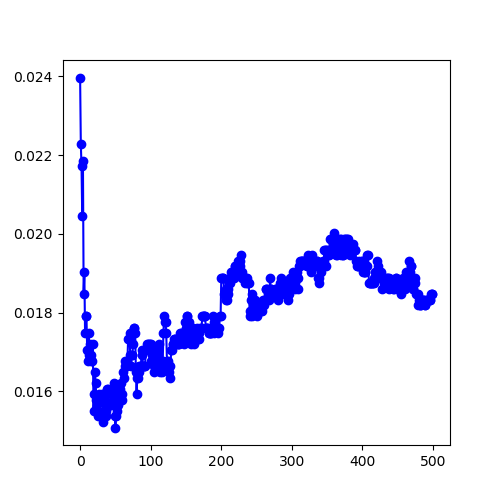

In [26]:
print(bst_n_estimators_7)
fig = plt.figure(figsize=(5, 5))
plt.plot(errors_7, "bo-")
plt.show()

In [27]:
time1_gbrt_8 = datetime.datetime.now()
gbrt_8 = GradientBoostingClassifier(max_depth=1, n_estimators=500,learning_rate=0.5,random_state=None)
gbrt_8.fit(X_train, y_train)

errors_8 = [mean_squared_error(y_test, y_pred_gbrt_8)
          for y_pred_gbrt_8 in gbrt_8.staged_predict(X_test)]
bst_n_estimators_8 = np.argmin(errors_8)

gbrt_best_8 = GradientBoostingClassifier(max_depth=1,n_estimators=bst_n_estimators_8,learning_rate=0.5,random_state=None,verbose=1)
model_gbrt_8 = gbrt_best_8.fit(X_train, y_train)
y_pred_gbrt_best_8 = gbrt_best_8.predict(X_test)
y_probs_gbrt_best_8 = gbrt_best_8.predict_proba(X_test)[:, 1]
time2_gbrt_8 = datetime.datetime.now()
print_score(y_test,y_pred_gbrt_best_8,time1_gbrt_8 ,time2_gbrt_8)

      Iter       Train Loss   Remaining Time 
         1           0.7070            4.93s
         2           0.4457            4.80s
         3           0.3270            4.82s
         4           0.2566            4.71s
         5           0.2121            4.69s
         6           0.1856            4.66s
         7           0.1680            4.63s
         8           0.1550            4.60s
         9           0.1454            4.58s
        10           0.1438            4.54s
        20           0.1235            4.28s
        30           0.1181            4.11s
        40           0.1116            3.93s
        50           0.1096            3.69s
        60           0.1051            3.45s
        70           0.1031            3.22s
        80           0.1004            2.99s
        90           0.0991            2.76s
       100           0.0969            2.54s
       200           0.0838            0.35s
comfusion matrix = 
[[2804   73]
 [  63 4153]]

accura

216


<IPython.core.display.Javascript object>


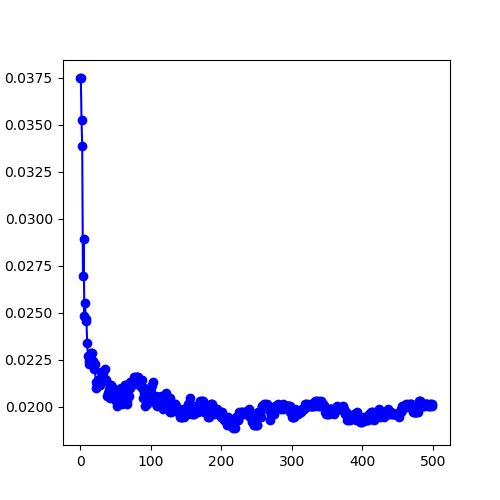

In [28]:
print(bst_n_estimators_8)
fig = plt.figure(figsize=(5, 5))
plt.plot(errors_8, "bo-")
plt.show()

In [29]:
time1_gbrt_9 = datetime.datetime.now()
gbrt_9 = GradientBoostingClassifier(max_depth=1, n_estimators=500,learning_rate=0.75,random_state=None)
gbrt_9.fit(X_train, y_train)

errors_9 = [mean_squared_error(y_test, y_pred_gbrt_9)
          for y_pred_gbrt_9 in gbrt_9.staged_predict(X_test)]
bst_n_estimators_9 = np.argmin(errors_9)

gbrt_best_9 = GradientBoostingClassifier(max_depth=1,n_estimators=bst_n_estimators_9,learning_rate=0.75,random_state=None,verbose=1)
model_gbrt_9 = gbrt_best_9.fit(X_train, y_train)
y_pred_gbrt_best_9 = gbrt_best_9.predict(X_test)
y_probs_gbrt_best_9 = gbrt_best_9.predict_proba(X_test)[:, 1]
time2_gbrt_9 = datetime.datetime.now()
print_score(y_test,y_pred_gbrt_best_9,time1_gbrt_9 ,time2_gbrt_9)

      Iter       Train Loss   Remaining Time 
         1           0.5265            8.51s
         2           0.2951            8.12s
         3           0.2210            8.10s
         4           0.1805            7.99s
         5           0.1592            8.06s
         6           0.1462            8.03s
         7           0.1444            7.96s
         8           0.1377            7.99s
         9           0.1326            7.97s
        10           0.1312            7.95s
        20           0.1210            7.88s
        30           0.1148            7.73s
        40           0.1087            7.43s
        50           0.1037            7.15s
        60           0.1003            6.89s
        70           0.0953            6.69s
        80           0.0931            6.44s
        90           0.0904            6.21s
       100           0.0884            5.97s
       200           0.0743            3.75s
       300           0.0661            1.57s
comfusion

372


<IPython.core.display.Javascript object>


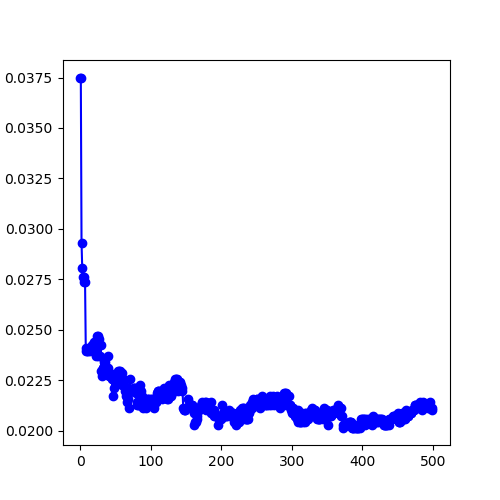

In [30]:
print(bst_n_estimators_9)
fig = plt.figure(figsize=(5, 5))
plt.plot(errors_9, "bo-")
plt.show()

## Feature Importance

<IPython.core.display.Javascript object>


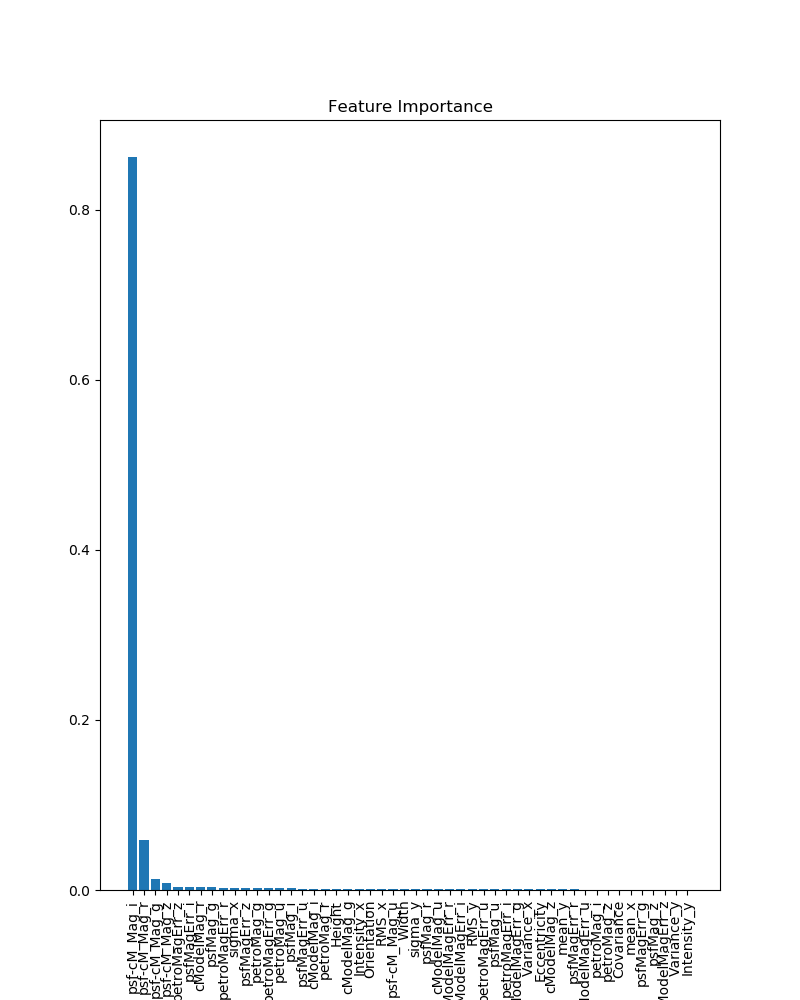

In [102]:
# Calculate feature importances
importances = tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature[i] for i in indices]
# Create plot
plt.figure(figsize=(8,10))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

### Cross-validation

In [31]:
scores = cross_val_score(tree_ent, X_train, y_train,scoring="accuracy", cv=10)
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
scores = pd.DataFrame(scores)
display(scores)

[0.97886332 0.98027243 0.9769845  0.96991067 0.977433   0.96897038
 0.9783733  0.97320169 0.97508228 0.97273155]
Average cross-validation score: 0.98


,0
0,0.978863
1,0.980272
2,0.976984
3,0.969911
4,0.977433
5,0.968970
6,0.978373
7,0.973202
8,0.975082
9,0.972732


### Confusion Matrix

<IPython.core.display.Javascript object>


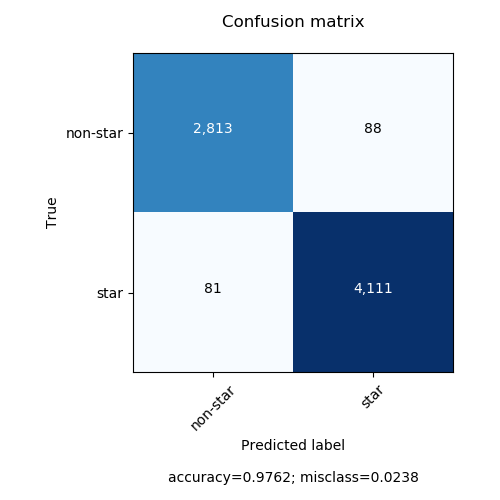

In [47]:
labels = ["non-star", "star"]
cms = confusion_matrix(y_test, y_pred_tree_ent)
accuracy = np.trace(cms) / float(np.sum(cms))
misclass = 1 - accuracy

figs = plt.figure(figsize=(5, 5))
cmap = plt.get_cmap('Blues')
plt.imshow(cms, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix\n')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels , rotation=45)
plt.yticks(tick_marks, labels)
plt.ylim(len(cms)-0.5, -0.5)
# plt.colorbar()

thresh = cms.max() / 2
for i, j in itertools.product(range(cms.shape[0]), range(cms.shape[1])):
    plt.text(j, i, "{:,}".format(cms[i, j]), horizontalalignment="center",
             color="white" if cms[i, j] > thresh else "black")

plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Result

In [31]:
score_gbc_0 = score(y_test,y_pred_gbc,time1_gbc,time2_gbc)
score_gbc_1 = score(y_test,y_pred_gbrt_best_1,time1_gbrt_1 ,time2_gbrt_1)
score_gbc_2 = score(y_test,y_pred_gbrt_best_2,time1_gbrt_2 ,time2_gbrt_2)
score_gbc_3 = score(y_test,y_pred_gbrt_best_3,time1_gbrt_3 ,time2_gbrt_3)
score_gbc_4 = score(y_test,y_pred_gbrt_best_4,time1_gbrt_4 ,time2_gbrt_4)
score_gbc_5 = score(y_test,y_pred_gbrt_best_5,time1_gbrt_5 ,time2_gbrt_5)
score_gbc_6 = score(y_test,y_pred_gbrt_best_6,time1_gbrt_6 ,time2_gbrt_6)
score_gbc_7 = score(y_test,y_pred_gbrt_best_7,time1_gbrt_7 ,time2_gbrt_7)
score_gbc_8 = score(y_test,y_pred_gbrt_best_8,time1_gbrt_8 ,time2_gbrt_8)
score_gbc_9 = score(y_test,y_pred_gbrt_best_9,time1_gbrt_9 ,time2_gbrt_9)

In [32]:
m1_t = pd.DataFrame({
 'accuracy' : [score_gbc_0[1],score_gbc_1[1],score_gbc_2 [1],score_gbc_3[1],score_gbc_4[1],score_gbc_5[1],score_gbc_6[1],score_gbc_7[1],score_gbc_8[1],score_gbc_9[1]],
 'completeness' : [score_gbc_0[2],score_gbc_1[2],score_gbc_2 [2],score_gbc_3[2],score_gbc_4[2],score_gbc_5[2],score_gbc_6[2],score_gbc_7[2],score_gbc_8[2],score_gbc_9[2]],
 'contamination' : [score_gbc_0[3],score_gbc_1[3],score_gbc_2 [3],score_gbc_3[3],score_gbc_4[3],score_gbc_5[3],score_gbc_6[3],score_gbc_7[3],score_gbc_8[3],score_gbc_9[3]],
 'precision' : [score_gbc_0[4],score_gbc_1[4],score_gbc_2 [4],score_gbc_3[4],score_gbc_4[4],score_gbc_5[4],score_gbc_6[4],score_gbc_7[4],score_gbc_8[4],score_gbc_9[4]],
 'recall' : [score_gbc_0[5],score_gbc_1[5],score_gbc_2 [5],score_gbc_3[5],score_gbc_4[5],score_gbc_5[5],score_gbc_6[5],score_gbc_7[5],score_gbc_8[5],score_gbc_9[5]],
 'F1 score' : [score_gbc_0[6],score_gbc_1[6],score_gbc_2 [6],score_gbc_3[6],score_gbc_4[6],score_gbc_5[6],score_gbc_6[6],score_gbc_7[6],score_gbc_8[6],score_gbc_9[6]],
 'time span' : [score_gbc_0[7],score_gbc_1[7],score_gbc_2 [7],score_gbc_3[7],score_gbc_4[7],score_gbc_5[7],score_gbc_6[7],score_gbc_7[7],score_gbc_8[7],score_gbc_9[7]]
                })

m1_t.rename(index = {0: "gbc_0", 
                     1: "gbc_1",
                     2: "gbc_2",
                     3: "gbc_3",
                     4: "gbc_4",
                     5: "gbc_5",
                     6: "gbc_6",
                     7: "gbc_7",
                     8: "gbc_8",
                     9: "gbc_9"
                    },inplace = True)
m1_t

,accuracy,completeness,contamination,precision,recall,F1 score,time span
gbc_0,0.984351,0.987429,0.013741,0.986259,0.987429,0.986844,00:00:08.195777
gbc_1,0.986325,0.989089,0.012082,0.987918,0.989089,0.988503,00:02:09.063337
gbc_2,0.987593,0.990987,0.011826,0.988174,0.990987,0.989578,00:01:13.078818
gbc_3,0.980967,0.985294,0.017270,0.982730,0.985294,0.984010,00:00:22.141203
gbc_4,0.985620,0.989801,0.013941,0.986059,0.989801,0.987926,00:00:50.381061
gbc_5,0.984774,0.987429,0.013039,0.986961,0.987429,0.987195,00:00:35.690326
gbc_6,0.985620,0.989326,0.013482,0.986518,0.989326,0.987920,00:01:03.536185
gbc_7,0.984210,0.989089,0.015581,0.984419,0.989089,0.986749,00:00:38.106335
gbc_8,0.980826,0.985057,0.017274,0.982726,0.985057,0.983890,00:00:16.098952
gbc_9,0.979275,0.984583,0.019372,0.980628,0.984583,0.982601,00:00:19.298502


<IPython.core.display.Javascript object>


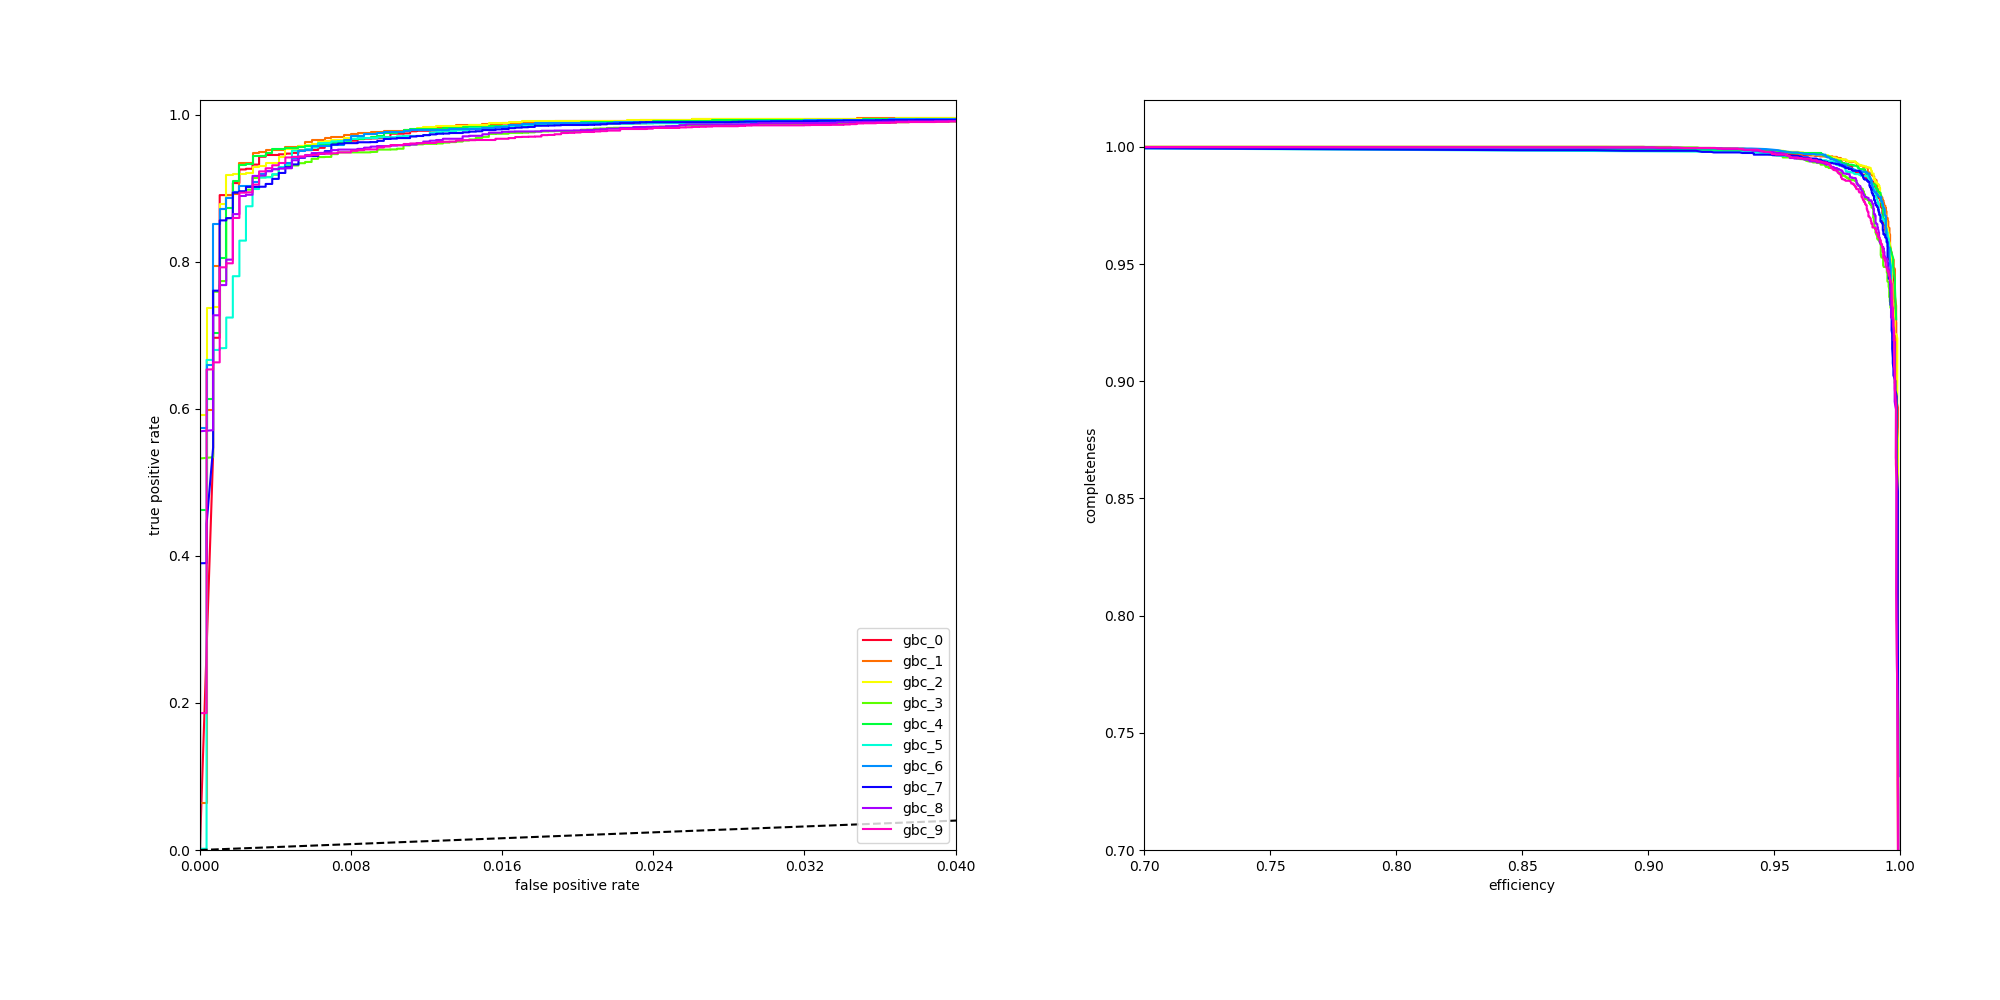

In [34]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)


thresholds = np.linspace(0, 1, 1001)[:-1]

names_model = list(m1_t.index)
probs_model = [y_probs_gbc, y_probs_gbrt_best_1, y_probs_gbrt_best_2, y_probs_gbrt_best_3, y_probs_gbrt_best_4, y_probs_gbrt_best_5, y_probs_gbrt_best_6, y_probs_gbrt_best_7, y_probs_gbrt_best_8, y_probs_gbrt_best_9]
# colors = cm.nipy_spectral(np.linspace(0, 1, len(list(m1_t.index))))
colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model, colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=name,color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=name,color=c)

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()